![Cart Spring Problem Question and Diagram](./imgs/cart_spring_pendulum.png)

Let $x$ be the distance in the x direction from equilibrium position for body $m_1$

In [1]:
# Variable definitions
from mathpad import *

x = "x(t)" * m
m1 = "m1" * kg

theta = "theta(t)" * radians
m2 = "m2" * kg

k = "k" * N / m
l = "l" * m

F = "F(t)" * N
g = "g" * meter / s**2

tabulate(x, m1, theta, m2, k, l, F, g)

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃  Entity   ┃         Units   ┃
┣━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃      x(t) ┃           meter ┃
┃        m1 ┃        kilogram ┃
┃  theta(t) ┃          radian ┃
┃        m2 ┃        kilogram ┃
┃         k ┃    newton/meter ┃
┃         l ┃           meter ┃
┃      F(t) ┃          newton ┃
┃         g ┃ meter/second**2 ┃
┗━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━┛



In [2]:
print("Position of m2 wrt origin")

print("i direction")
r_2_O_i = x + l * sin(theta)
display(r_2_O_i)

print("j direction")
r_2_O_j = -l * cos(theta)
display(r_2_O_j)

print("Velocity of m2 wrt origin")

print("i direction")
v_2_i = diff(r_2_O_i)
display(v_2_i)

print("j direction")
v_2_j = diff(r_2_O_j)
display(v_2_j)

print("Magnitude of Velocity of m2 wrt origin")
v_2 = magnitude(v_2_i, v_2_j)
v_2

Position of m2 wrt origin
i direction


l*sin(theta(t)) + x(t) meters

j direction


-l*cos(theta(t)) meters

Velocity of m2 wrt origin
i direction


l*cos(theta(t))*Derivative(theta(t), t) + Derivative(x(t), t) meters/second

j direction


l*sin(theta(t))*Derivative(theta(t), t) meters/second

Magnitude of Velocity of m2 wrt origin


1.4142(0.5*l**2*Derivative(theta(t), t)**2 + l*cos(theta(t))*Derivative(theta(t), t)*Derivative(x(t), t) + 0.5*Derivative(x(t), t)**2)**0.5 meters/second

In [3]:
# Kinetic energy
from mathpad.mech import kinetic_energy, elastic_energy, euler_lagrange, gravitational_energy

print("Kinetic Energy")
T = factor(kinetic_energy(m1, diff(x)) + kinetic_energy(m2, v_2))
T

Kinetic Energy


0.5*l**2*m2*Derivative(theta(t), t)**2 + l*m2*cos(theta(t))*Derivative(theta(t), t)*Derivative(x(t), t) + 0.5*mDerivative(x(t), t)**2 + 0.5*m2*Derivative(x(t), t)**2 kilogram*meters**2/second**2

In [4]:
print("Potential Energy")
V = elastic_energy(k, x) + gravitational_energy(m2, r_2_O_j, g)
V

Potential Energy


-g*l*m2*cos(theta(t)) + 0.5*k*x(t)**2 meter*newtons

In [5]:
print("Dynamics of Body 1")
x_dynamics = euler_lagrange(T, V, F, x)
x_dynamics

Dynamics of Body 1


k*x(t) - l*m2*sin(theta(t))*Derivative(theta(t), t)**2 + l*m2*cos(theta(t))*Derivative(theta(t), (t, 2)) + mDerivative(x(t), (t, 2)) + m2*Derivative(x(t), (t, 2)) = F(t) kilogram*meter/second**2

In [6]:
print("Dynamics of Body 2")
theta_dynamics = euler_lagrange(T, V, 0, theta)
theta_dynamics

Dynamics of Body 2


l*m2*(g*sin(theta(t)) + l*Derivative(theta(t), (t, 2)) + cos(theta(t))*Derivative(x(t), (t, 2))) = 0 kilogram*meter**2/(radian*second**2)

Solving subbed Equations
Solving finished. Simulating...


  0%|          | 0/10 [00:00<?, ?it/s]

Simulation finished. Plotting...


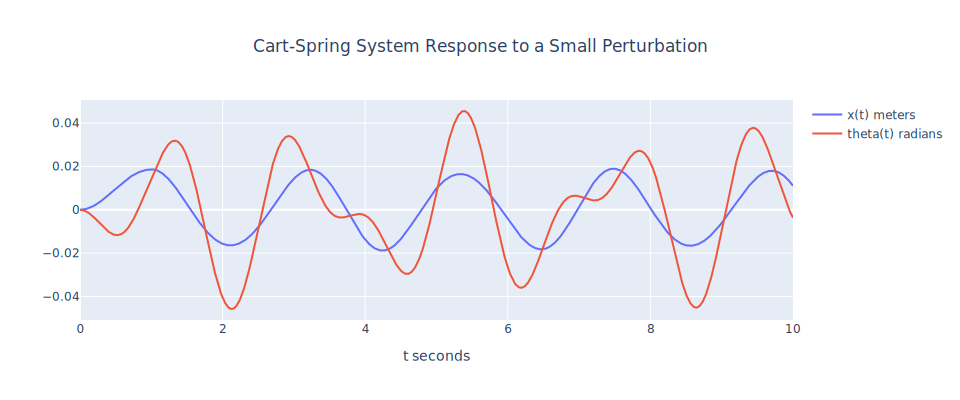

In [8]:
sim_data = simulate_dynamic_system(
    [x_dynamics, theta_dynamics],
    plot_title="Cart-Spring System Response to a Small Perturbation",
    x_f=10, max_step=0.01,
    substitute={
        k: 100,
        m1: 10,
        m2: 1,
        l: 0.5,
        g: 9.81,
        # A small perturbation
        F: piecewise(t, [(1, 1 * N), (float('inf'), 0 * N)])
    },
    initial_conditions={
        x: 0,
        diff(x): 0,
        theta: 0,
        diff(theta): 0
    },
    record=[x, theta],
    plot_static=True
)